In [15]:

pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 187.6/187.6 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 13.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install seaborn

     -------------------------------------- 294.6/294.6 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Verifique os nomes das colunas
print(dados.columns)

# Verifique os dados
print(dados.head())


# Leitura de uma única temporada para inspecionar as colunas
sample_data = pd.read_csv('ProjetoBET - 20_21.csv', skiprows=18)

# Imprimir as colunas disponíveis
print(sample_data.columns)


Index(['16', 'Ajax Amsterdam', '34', '35', '4', '47', 'PSV Eindhoven', '43',
       '0', '43.1', 'Unnamed: 0', 'Excelsior', '48', '1', '51', 'AZ Alkmaar',
       '16.1', '18', '18.1'],
      dtype='object')
    16 Ajax Amsterdam    34    35    4    47 PSV Eindhoven  43   0  43.1  \
0   17   RKC Waalwijk  34.0  34.0  2.0  40.0           NaN NaN NaN   NaN   
1  NaN  PSV Eindhoven  34.0  40.0  0.0  40.0           NaN NaN NaN   NaN   
2  NaN            NaN   NaN   NaN  NaN   NaN           NaN NaN NaN   NaN   
3  NaN            NaN   NaN   NaN  NaN   NaN           NaN NaN NaN   NaN   
4  NaN            NaN   NaN   NaN  NaN   NaN           NaN NaN NaN   NaN   

   Unnamed: 0 Excelsior  48   1  51 AZ Alkmaar  16.1  18  18.1  
0         NaN       NaN NaN NaN NaN        NaN   NaN NaN   NaN  
1         NaN       NaN NaN NaN NaN        NaN   NaN NaN   NaN  
2         NaN       NaN NaN NaN NaN        NaN   NaN NaN   NaN  
3         NaN       NaN NaN NaN NaN        NaN   NaN NaN   NaN  
4         N

   RK          TEAM   P  YC  RC  PTS
0   1       Vitesse  34  55   5   70
1   2      FC Emmen  34  48   5   63
2   3  ADO Den Haag  34  57   2   63
3   4     VVV-Venlo  34  45   5   60
4   5  FC Groningen  35  50   3   59
Colunas disponíveis: Index(['RK', 'TEAM', 'P', 'YC', 'RC', 'PTS'], dtype='object')
Colunas do DataFrame resultante: Index(['RK_x', 'TEAM', 'P_x', 'YC_x', 'RC_x', 'PTS_x', 'RK_y', 'P_y', 'YC_y',
       'RC_y', 'PTS_y'],
      dtype='object')


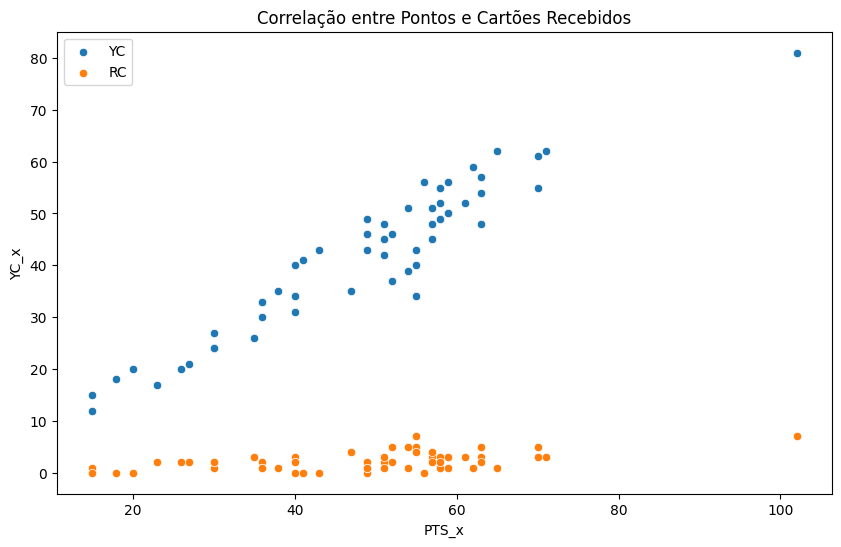

In [34]:
# Função para encontrar a linha correta dos rótulos das colunas
def find_header_row(file_path):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if 'RK,TEAM,P,YC,RC,PTS' in line:
                return i
    return 0

# Coleta de Dados
temporadas = ['20_21', '21_22', '22_23', '23_24']

# Leitura de dados e concatenação
dados = pd.concat([pd.read_csv(f'ProjetoBET - {temporada}.csv', skiprows=find_header_row(f'ProjetoBET - {temporada}.csv')) for temporada in temporadas])

# Imprima as primeiras linhas do DataFrame
print(dados.head())

# Imprima todas as colunas disponíveis
print("Colunas disponíveis:", dados.columns)

# Chances dos Times Receberem Cartões em Relação à Tabela
def analise_chances_cartoes(dados, tabela_atual):
    dados_com_tabela = pd.merge(dados, tabela_atual, on='TEAM')
    
    # Imprima as colunas do DataFrame resultante
    print("Colunas do DataFrame resultante:", dados_com_tabela.columns)

    # Visualização com Seaborn scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PTS_x', y='YC_x', data=dados_com_tabela, label='YC')
    sns.scatterplot(x='PTS_x', y='RC_x', data=dados_com_tabela, label='RC')
    plt.title('Correlação entre Pontos e Cartões Recebidos')
    plt.legend()
    plt.show()

# Use a tabela atual correspondente à última temporada disponível
tabela_atual_23_24 = pd.read_csv('ProjetoBET - 23_24.csv', skiprows=find_header_row('ProjetoBET - 23_24.csv'))
analise_chances_cartoes(dados, tabela_atual_23_24)

In [44]:
# Carregue os dados das temporadas passadas
dados_passados = pd.concat([pd.read_csv(r'ProjetoBET - 20_21.csv'), pd.read_csv(r'ProjetoBET - 21_22.csv'), pd.read_csv(r'ProjetoBET - 22_23.csv')])

# Carregue os dados da temporada atual
dados_atual = pd.read_csv(r'ProjetoBET - 23_24.csv')

# Imprima as primeiras linhas dos DataFrames e as colunas
print("Primeiras linhas do DataFrame 'dados_passados':")
print(dados_passados.head())
print("\nColunas do DataFrame 'dados_passados':")
print(dados_passados.columns)

print("\nPrimeiras linhas do DataFrame 'dados_atual':")
print(dados_atual.head())
print("\nColunas do DataFrame 'dados_atual':")
print(dados_atual.columns)

# Calcule as médias das temporadas passadas
medias_passadas = dados_passados.groupby('TEAM')[['YC', 'RC']].mean()

# Una as médias com os dados da temporada atual
dados_atual_com_medias = pd.merge(dados_atual, medias_passadas, how='left', on='TEAM', suffixes=('_atual', '_media_passada'))

# Identifique times com menos chances de receber cartões na temporada atual
times_com_menos_chances = dados_atual_com_medias[(dados_atual_com_medias['YC_atual'] < dados_atual_com_medias['YC_media_passada']) & 
                                                (dados_atual_com_medias['RC_atual'] < dados_atual_com_medias['RC_media_passada'])]

# Exiba os resultados
print(times_com_menos_chances[['TEAM', 'YC_atual', 'RC_atual', 'YC_media_passada', 'RC_media_passada']])

Primeiras linhas do DataFrame 'dados_passados':
  eredivisie yellow and red cards    Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                             NaN           NaN        NaN        NaN   
1                              RK          TEAM          P         YC   
2                               1       Vitesse         34         55   
3                               2      FC Emmen         34         48   
4                               3  ADO Den Haag         34         57   

  Unnamed: 4 Unnamed: 5 Unnamed: 0  
0        NaN        NaN        NaN  
1         RC        PTS        NaN  
2          5         70        NaN  
3          5         63        NaN  
4          2         63        NaN  

Colunas do DataFrame 'dados_passados':
Index(['eredivisie yellow and red cards', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 0'],
      dtype='object')

Primeiras linhas do DataFrame 'dados_atual':
  Unnamed: 0       Unnamed: 1 Unnamed: 2 Unnamed:

KeyError: 'TEAM'